email dataset for spam detection project EDA

In [103]:
#imports 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [104]:
#import dataset
email_df=pd.read_csv("spam_ham_dataset.csv")
email_df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


Data cleaning

In [105]:
email_df.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [106]:
email_df.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


In [107]:
#drop the first unnamed column and label column
email_df=email_df.drop(columns={"Unnamed: 0","label"},axis=1)
email_df.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [108]:
print(len(email_df))

5171


In [109]:
email_df=email_df.rename(columns={"text":"Subject","label_num":"Label"})

C:\Users\Malhar\AppData\Local\Temp\ipykernel_6548\3203236877.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=email_df["Label"],palette=["blue","red"])


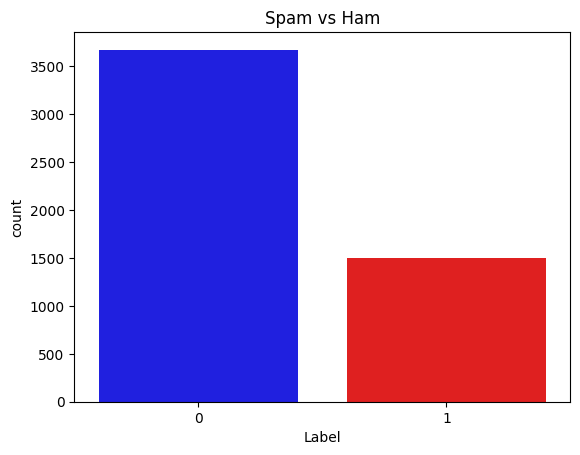

In [110]:
#plotting the number of emails classified as spam and ham (ham=0,spam=1)
sns.countplot(x=email_df["Label"],palette=["blue","red"])
plt.title("Spam vs Ham")
plt.show()

In [111]:
spam,ham=email_df["Label"].value_counts()
print(spam,"\n",ham)

3672 
 1499


In [112]:
spam_per=(spam/len(email_df))*100
print("spam percentage ",spam_per)
ham_per=(ham/len(email_df))*100
print("spam percentage ",ham_per)

spam percentage  71.01140978534133
spam percentage  28.98859021465867


In [113]:
#convert everything to lowercase 
# email_df.head()
email_df["Subject"]=email_df["Subject"].str.lower()
email_df.head()

,Subject,Label
0,subject: enron methanol ; meter # : 988291\r\n...,0
1,"subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"subject: photoshop , windows , office . cheap ...",1
4,subject: re : indian springs\r\nthis deal is t...,0


In [115]:
email_df.to_csv("emails.csv")